In [1]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

In [29]:
import re

In [2]:
nlp = spacy.load('en_core_web_sm')

In [6]:
doc = nlp('Hello World!')

In [7]:
doc

Hello World!

In [8]:
for token in doc:
  print(token)

Hello
World
!


In [21]:
pattern = [{"LOWER": 'hello'}, {"IS_PUNCT": True, 'OP': '?'}, {"LOWER": "world"}]

In [22]:
matcher = Matcher(nlp.vocab)
matcher.add('HelloWorld', None, pattern)


In [23]:
doc = nlp('Hello, World!')

In [24]:
matches = matcher(doc)

In [25]:
matches # o/p shows the has value, start and end of the string

[(15578876784678163569, 0, 3)]

In [26]:
for match_id, start, end in matches:
  string_id = nlp.vocab.strings[match_id]
  span = doc[start:end]
  print(match_id, string_id, start, end, span.text)


15578876784678163569 HelloWorld 0 3 Hello, World


In [ ]:
# check https://explosion.ai/demos/matcher to perform visual matching

## **Regular Expression**

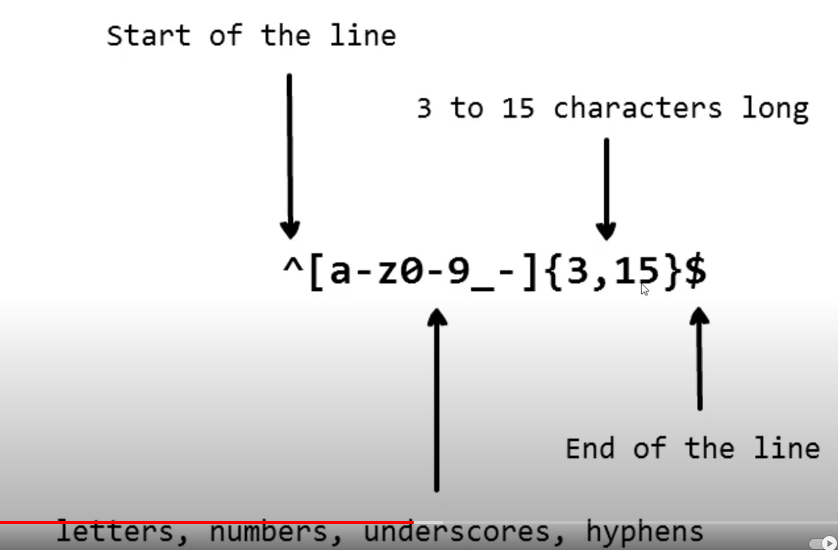

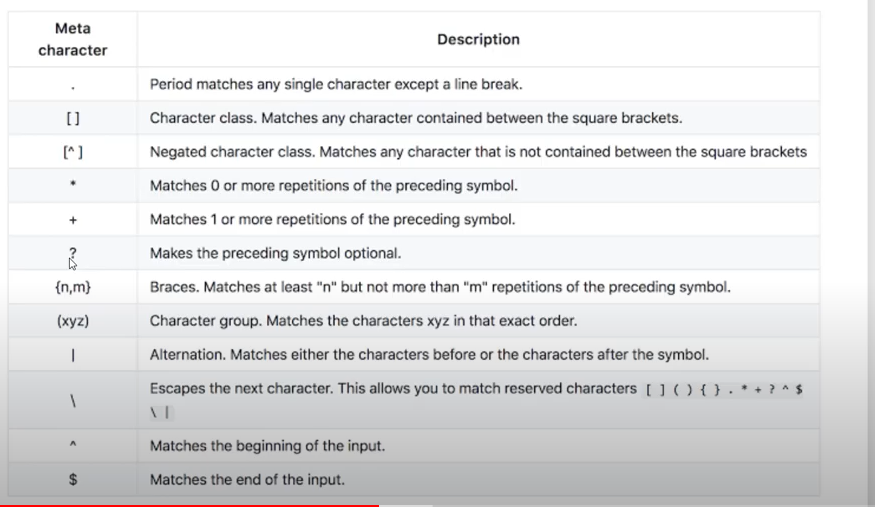

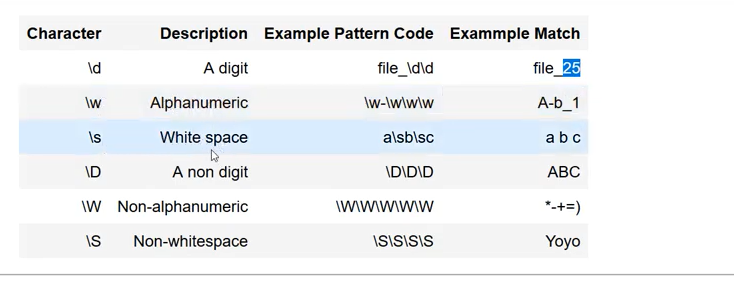

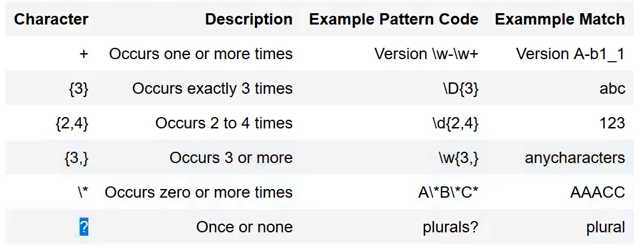

In [28]:
text = "my phone number is 1256. Ohh its wrong! Correct one is 1256348790. Call me"

In [30]:
re.search(r'\d{10}', text)

<re.Match object; span=(55, 65), match='1256348790'>

In [31]:
re.search(r'\d{4}', text)

<re.Match object; span=(19, 23), match='1256'>

In [33]:
re.findall(r'\d{4,10}', text)

['1256', '1256348790']

In [35]:
re.findall(r'\w{4}', text)

['phon', 'numb', '1256', 'wron', 'Corr', '1256', '3487', 'Call']

In [36]:
re.findall(r'\w{4,}', text)

['phone', 'number', '1256', 'wrong', 'Correct', '1256348790', 'Call']

## **Wild Card text**

In [37]:
re.findall(r'p....', text)

['phone']

In [38]:
re.findall(r'p..', text)

['pho']

In [40]:
re.findall(r'c....', text)

['ct on']

In [41]:
text = "this is cat but not that. i want hat and cat both"

In [43]:
re.findall(r'.a.', text) #start and end characters doesnt matter but should have a in the middle

['cat', 'hat', 'wan', 'hat', ' an', 'cat']

In [44]:
text = "hi thanks for watching <3"

In [45]:
re.findall(r'\d$', text) # ends with a number

['3']

In [46]:
re.findall(r'^\d', text) # does not start with a number

[]

### **Exclusion**

In [48]:
text = "3 hi thanks for watching <3"

In [49]:
#extract the text without the number
re.findall(r'[^\d]', text)

[' ',
 'h',
 'i',
 ' ',
 't',
 'h',
 'a',
 'n',
 'k',
 's',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'w',
 'a',
 't',
 'c',
 'h',
 'i',
 'n',
 'g',
 ' ',
 '<']

In [50]:
#extract the text without the number
re.findall(r'[^\d]+', text)

[' hi thanks for watching <']

In [54]:
re.findall(r'[^\D]+', text) # Get all the numbers

['3', '3']

In [55]:
text = "you can get free-videos on you-tube"

In [57]:
re.findall(r'[\w]+-[\w]+', text) # + mean get all the characters in sequence

['free-videos', 'you-tube']

### **regular expression in spacy**

In [65]:
text = "Google announced a new Pixel at Google I/O Google I/O is great place to get all updates from Google"

In [66]:
# how many times Google I/O has occured
pattern = [{'TEXT':'Google'}, {'TEXT': 'I'}, {'TEXT': '/'}, {'TEXT': 'O'}]

In [67]:
def callback_method(matcher, doc, i, matches):
  match_id, start, end = matches[i]
  entity = doc[start:end]
  print(entity.text)

In [68]:
matcher = Matcher(nlp.vocab)
matcher.add('Google', callback_method, pattern)

In [69]:
doc = nlp(text)

In [70]:
matcher(doc)

Google I/O
Google I/O


[(11578853341595296054, 6, 10), (11578853341595296054, 10, 14)]

In [ ]:
#Find work Google

In [71]:
pattern = [{'TEXT':'Google'}, {'TEXT': 'I', 'OP':'?'}, {'TEXT': '/','OP':'?'}, {'TEXT': 'O','OP':'?'}] # We don't kind if I/O is present or not

In [72]:
matcher = Matcher(nlp.vocab)
matcher.add('Google', callback_method, pattern)

In [73]:
doc = nlp(text)

In [74]:
matcher(doc)

Google
Google
Google I
Google I/
Google I/O
Google
Google I
Google I/
Google I/O
Google


[(11578853341595296054, 0, 1),
 (11578853341595296054, 6, 7),
 (11578853341595296054, 6, 8),
 (11578853341595296054, 6, 9),
 (11578853341595296054, 6, 10),
 (11578853341595296054, 10, 11),
 (11578853341595296054, 10, 12),
 (11578853341595296054, 10, 13),
 (11578853341595296054, 10, 14),
 (11578853341595296054, 22, 23)]